1.How are coefficients affected?

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [2]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['TARGET'] = data.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [3]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=2)

In [4]:
coefs = []
r2_scores =[]

for i in [0,0.1, 1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

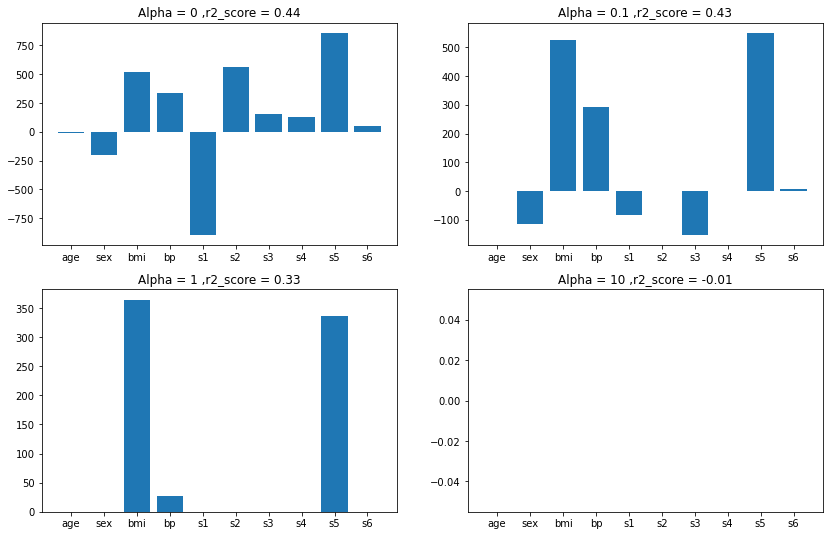

In [5]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()


2.Higher coefficients are affected more

In [7]:
alphas = [0,0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]
coefs =[]
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

In [8]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [9]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs =[]
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

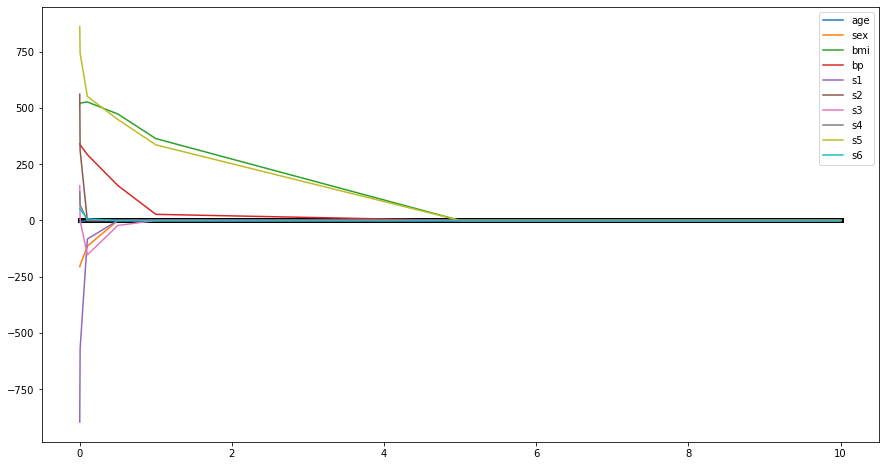

In [12]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

3.Impact on Bias and Variance

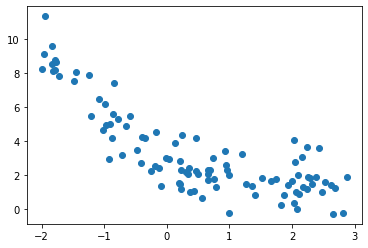

In [13]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X **2 - 2* X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1), y.reshape(100), test_size = 0.2, random_state = 2)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [20]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0, 30, 100)

loss =[]
bias =[]
variance=[]

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss ='mse',
        random_seed =123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.936e+01, tolerance: 7.183e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.814e+01, tolerance: 6.380e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use th

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.193e+01, tolerance: 6.184e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use th

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.705e+01, tolerance: 4.314e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.834e+01, tolerance: 4.339e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.477e+01, tolerance: 6.349e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.380e+01, tolerance: 5.515e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.369e+01, tolerance: 3.426e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.025e+01, tolerance: 5.646e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.318e+01, tolerance: 6.481e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.952e+01, tolerance: 6.424e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.260e+01, tolerance: 6.305e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.889e+01, tolerance: 6.056e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.270e+01, tolerance: 7.007e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.556e+01, tolerance: 4.429e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.716e+01, tolerance: 6.369e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.435e+01, tolerance: 5.867e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.314e+01, tolerance: 6.422e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.413e+01, tolerance: 5.650e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+01, tolerance: 6.527e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.950e+01, tolerance: 3.351e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.554e+01, tolerance: 3.714e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.244e+01, tolerance: 5.281e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.417e+01, tolerance: 6.132e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.686e+01, tolerance: 4.300e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+01, tolerance: 6.424e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+01, tolerance: 5.746e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+01, tolerance: 3.426e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e+01, tolerance: 5.646e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+00, tolerance: 4.778e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+01, tolerance: 6.481e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.916e+01, tolerance: 4.545e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.097e+01, tolerance: 6.242e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e+01, tolerance: 5.414e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+01, tolerance: 7.183e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+01, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.573e+00, tolerance: 5.260e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+01, tolerance: 6.235e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.672e+00, tolerance: 6.017e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.267e+01, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.932e+01, tolerance: 6.565e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.380e+01, tolerance: 4.115e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+00, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.450e+01, tolerance: 4.918e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+00, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+01, tolerance: 3.482e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.028e+01, tolerance: 5.174e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.066e+00, tolerance: 5.699e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+00, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+01, tolerance: 6.660e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.023e+00, tolerance: 5.837e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+01, tolerance: 7.256e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.455e+00, tolerance: 4.169e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.015e+01, tolerance: 4.283e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+00, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+01, tolerance: 5.999e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.924e-01, tolerance: 4.844e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.115e-01, tolerance: 6.079e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+00, tolerance: 6.174e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e-01, tolerance: 5.506e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+00, tolerance: 5.612e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e-01, tolerance: 5.470e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.299e-01, tolerance: 5.147e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.073e-01, tolerance: 5.375e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+01, tolerance: 4.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+01, tolerance: 5.622e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.933e+01, tolerance: 4.314e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.270e+01, tolerance: 4.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e-01, tolerance: 5.680e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+01, tolerance: 4.853e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+00, tolerance: 5.505e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.852e+01, tolerance: 4.778e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+00, tolerance: 6.481e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+01, tolerance: 6.288e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+01, tolerance: 4.762e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+01, tolerance: 6.491e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+00, tolerance: 5.891e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.245e+01, tolerance: 4.966e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.272e+00, tolerance: 5.769e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e-01, tolerance: 4.214e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+01, tolerance: 6.352e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+01, tolerance: 5.920e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.685e-01, tolerance: 6.724e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+01, tolerance: 5.932e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+01, tolerance: 6.860e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.226e-01, tolerance: 7.067e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+01, tolerance: 5.938e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.752e+01, tolerance: 6.073e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.783e+00, tolerance: 5.827e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+01, tolerance: 4.429e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+01, tolerance: 5.528e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+01, tolerance: 6.951e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+01, tolerance: 5.351e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.276e+01, tolerance: 5.940e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.510e+01, tolerance: 6.049e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+01, tolerance: 5.436e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.236e+01, tolerance: 6.349e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.454e-01, tolerance: 4.853e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.194e+01, tolerance: 5.505e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.792e+01, tolerance: 5.680e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.550e+01, tolerance: 5.931e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+01, tolerance: 5.990e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.872e+01, tolerance: 5.932e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+01, tolerance: 5.672e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+01, tolerance: 5.436e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e+01, tolerance: 5.347e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.320e+01, tolerance: 5.890e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+01, tolerance: 7.067e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.364e+00, tolerance: 5.938e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.863e+01, tolerance: 5.827e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+01, tolerance: 4.571e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.596e+01, tolerance: 3.915e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+01, tolerance: 5.414e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+01, tolerance: 5.507e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.722e-01, tolerance: 5.102e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.932e+01, tolerance: 5.837e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.484e+01, tolerance: 6.422e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e+01, tolerance: 5.060e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.775e+01, tolerance: 4.886e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.228e-02, tolerance: 5.281e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+01, tolerance: 5.860e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.272e-01, tolerance: 4.966e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.010e+01, tolerance: 5.769e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.402e+01, tolerance: 6.352e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.996e+01, tolerance: 6.468e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+01, tolerance: 5.517e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+01, tolerance: 5.375e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.496e+01, tolerance: 4.339e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.113e-01, tolerance: 4.887e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.274e+01, tolerance: 5.920e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.472e+01, tolerance: 6.724e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.285e+01, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.565e+01, tolerance: 6.769e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+01, tolerance: 5.515e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.339e-01, tolerance: 4.853e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.361e+01, tolerance: 4.314e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.576e+01, tolerance: 4.339e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+00, tolerance: 5.684e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+01, tolerance: 5.574e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+01, tolerance: 6.860e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.718e+01, tolerance: 5.505e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.781e+01, tolerance: 7.067e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.253e-01, tolerance: 5.684e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.324e+01, tolerance: 6.056e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e+01, tolerance: 6.605e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+01, tolerance: 5.672e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.376e-01, tolerance: 4.115e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.327e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.538e+01, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.378e+01, tolerance: 5.194e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.328e+01, tolerance: 5.889e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.216e-01, tolerance: 5.820e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.662e+01, tolerance: 4.574e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+01, tolerance: 5.253e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.798e+01, tolerance: 5.275e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.682e+01, tolerance: 5.758e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.076e+01, tolerance: 4.586e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.904e+01, tolerance: 5.800e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.908e+01, tolerance: 4.450e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+00, tolerance: 4.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.744e+00, tolerance: 5.680e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.342e+01, tolerance: 5.671e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.543e+01, tolerance: 6.717e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+01, tolerance: 4.636e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.893e+01, tolerance: 7.122e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.305e+01, tolerance: 6.565e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.962e+01, tolerance: 6.714e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+01, tolerance: 4.636e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+01, tolerance: 7.122e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+00, tolerance: 5.567e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.715e+01, tolerance: 6.527e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+00, tolerance: 5.722e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+01, tolerance: 6.660e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+00, tolerance: 6.605e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+01, tolerance: 4.772e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.211e+01, tolerance: 5.341e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+01, tolerance: 5.672e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.921e+01, tolerance: 6.369e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+01, tolerance: 5.867e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.869e+01, tolerance: 4.470e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.629e-01, tolerance: 5.233e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.109e+01, tolerance: 5.612e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.921e+01, tolerance: 6.402e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+01, tolerance: 5.751e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+01, tolerance: 6.352e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.495e-01, tolerance: 4.647e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+00, tolerance: 6.380e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.263e-01, tolerance: 5.275e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.923e-01, tolerance: 6.886e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e-01, tolerance: 5.820e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.192e+01, tolerance: 4.877e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.393e+01, tolerance: 6.380e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.714e+01, tolerance: 5.671e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+01, tolerance: 5.755e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e-01, tolerance: 4.886e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.922e+01, tolerance: 5.260e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.366e-01, tolerance: 5.567e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e-01, tolerance: 4.115e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.558e-01, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+01, tolerance: 5.448e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+00, tolerance: 5.536e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.945e+01, tolerance: 5.650e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.148e+01, tolerance: 6.946e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.278e-01, tolerance: 4.838e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e-01, tolerance: 4.705e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.253e-01, tolerance: 5.233e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.344e+01, tolerance: 5.062e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.228e+01, tolerance: 5.755e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.827e+01, tolerance: 5.208e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+01, tolerance: 4.450e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.760e+01, tolerance: 6.050e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.865e-02, tolerance: 5.680e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.249e-01, tolerance: 5.931e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.059e+01, tolerance: 6.242e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+00, tolerance: 3.426e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e-01, tolerance: 4.778e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e-01, tolerance: 6.481e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+01, tolerance: 4.571e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+01, tolerance: 6.132e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e-01, tolerance: 5.837e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+00, tolerance: 6.422e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.295e+01, tolerance: 5.448e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.820e-01, tolerance: 5.536e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.879e-01, tolerance: 5.233e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.020e+01, tolerance: 5.062e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e-01, tolerance: 4.574e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.602e-01, tolerance: 4.838e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.009e+01, tolerance: 4.283e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.571e-01, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.209e-01, tolerance: 6.380e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.279e-01, tolerance: 5.348e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.379e+01, tolerance: 6.050e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.180e+01, tolerance: 5.622e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.951e+00, tolerance: 7.067e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.615e-02, tolerance: 5.820e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+01, tolerance: 5.539e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.154e+01, tolerance: 5.030e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.231e+01, tolerance: 3.947e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.584e-02, tolerance: 6.711e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e+00, tolerance: 4.586e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.223e+01, tolerance: 4.039e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.961e+01, tolerance: 5.671e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+01, tolerance: 6.717e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.187e-01, tolerance: 4.636e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.532e+00, tolerance: 7.122e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+00, tolerance: 6.565e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.081e+00, tolerance: 6.714e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.052e+00, tolerance: 6.946e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+00, tolerance: 5.194e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+01, tolerance: 4.169e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.345e+00, tolerance: 5.755e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e-01, tolerance: 4.545e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.022e+01, tolerance: 6.242e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.510e-01, tolerance: 4.636e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.885e+00, tolerance: 7.122e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+00, tolerance: 5.507e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.187e-01, tolerance: 5.060e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+00, tolerance: 6.079e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.561e-01, tolerance: 6.174e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.539e-01, tolerance: 4.892e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.739e-01, tolerance: 7.067e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e-01, tolerance: 4.772e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.607e+00, tolerance: 5.539e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e+01, tolerance: 3.947e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+01, tolerance: 4.470e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e-01, tolerance: 5.348e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.302e-01, tolerance: 5.517e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+00, tolerance: 6.288e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.431e-02, tolerance: 4.762e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e-01, tolerance: 6.422e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+00, tolerance: 5.650e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.133e-01, tolerance: 6.380e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e-01, tolerance: 5.348e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.747e-01, tolerance: 5.531e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.590e+00, tolerance: 4.345e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+00, tolerance: 5.697e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e+01, tolerance: 6.235e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.890e-01, tolerance: 5.427e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.566e+01, tolerance: 7.256e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.249e+00, tolerance: 6.242e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.039e-01, tolerance: 3.426e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+01, tolerance: 4.429e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e-01, tolerance: 5.528e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.473e-02, tolerance: 4.838e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+00, tolerance: 5.506e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.688e-01, tolerance: 5.617e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+00, tolerance: 5.888e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.621e-01, tolerance: 4.636e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+00, tolerance: 7.122e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.696e-01, tolerance: 6.714e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.926e-02, tolerance: 7.177e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+01, tolerance: 5.622e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e+01, tolerance: 4.314e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.783e+01, tolerance: 3.915e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.287e+00, tolerance: 5.414e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+00, tolerance: 5.769e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.123e+00, tolerance: 5.448e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+01, tolerance: 4.283e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.132e-02, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+00, tolerance: 4.877e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.607e-01, tolerance: 5.060e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.435e-01, tolerance: 4.886e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+01, tolerance: 4.283e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.769e-02, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+00, tolerance: 5.746e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+00, tolerance: 5.755e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.227e+00, tolerance: 5.448e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.315e-01, tolerance: 5.536e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.670e+00, tolerance: 6.049e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.648e-01, tolerance: 4.450e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+00, tolerance: 5.746e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+00, tolerance: 5.755e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.022e-01, tolerance: 5.769e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e+00, tolerance: 5.448e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+00, tolerance: 6.049e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e-01, tolerance: 4.450e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+01, tolerance: 3.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+00, tolerance: 5.746e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+00, tolerance: 6.527e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e-01, tolerance: 5.507e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+01, tolerance: 5.253e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.371e-01, tolerance: 5.275e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e-01, tolerance: 6.349e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+00, tolerance: 5.515e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+00, tolerance: 5.699e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+00, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.383e-01, tolerance: 5.463e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+01, tolerance: 5.253e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e-01, tolerance: 4.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.332e-02, tolerance: 6.184e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.613e-02, tolerance: 5.919e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e+00, tolerance: 4.571e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e-01, tolerance: 6.422e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+00, tolerance: 5.650e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e-01, tolerance: 5.517e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e-01, tolerance: 4.849e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.651e-01, tolerance: 4.450e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e+00, tolerance: 6.050e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+00, tolerance: 5.414e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+00, tolerance: 6.020e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+00, tolerance: 6.500e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e+00, tolerance: 6.565e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e-01, tolerance: 6.468e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.943e-01, tolerance: 6.079e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+00, tolerance: 4.877e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e-01, tolerance: 5.060e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e-01, tolerance: 4.886e-02
  model = cd_fast.enet_coordinate_descent(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co